In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('data/sales_train.csv.gz')
items = pd.read_csv('data/items.csv')
categories = pd.read_csv('data/item_categories.csv')
shops = pd.read_csv('data/shops.csv')

test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv.gz')

In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


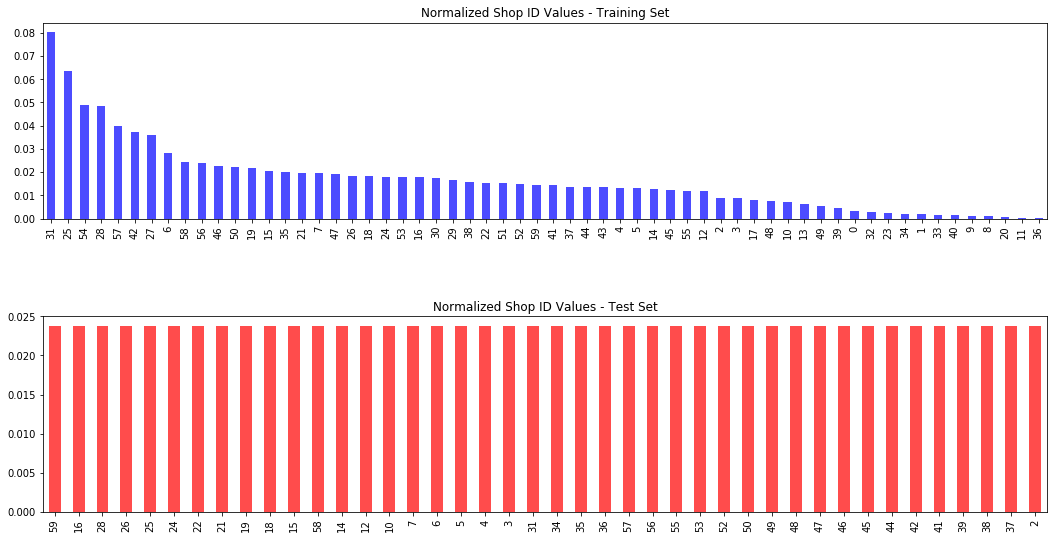

In [7]:
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((2,3), (0,0), colspan = 3)
train['shop_id'].value_counts(normalize=True).plot(kind='bar', color = 'blue', alpha=0.7)
plt.title('Normalized Shop ID Values - Training Set')

plt.subplot2grid((2,3), (1,0), colspan = 3)
test['shop_id'].value_counts(normalize=True).plot(kind='bar', color = 'red', alpha=0.7)
plt.title('Normalized Shop ID Values - Test Set')
plt.savefig('plots/shop_id.png')

plt.show()

<Figure size 720x576 with 0 Axes>

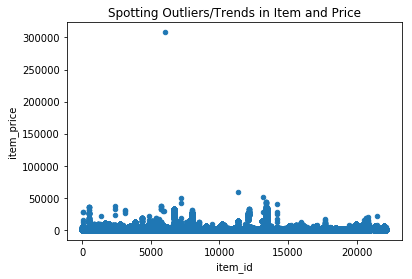

In [9]:
fig = plt.figure(figsize=(10,8))
train.plot(kind='scatter', x='item_id', y='item_price')
plt.title('Spotting Outliers/Trends in Item and Price')
plt.savefig('plots/outliers.png')
plt.show()

In [10]:
train['revenue'] = train['item_price'] * train['item_cnt_day']

In [11]:
revenue_by_month = train.groupby('date_block_num')['revenue'].sum().rename('revenue_by_month').reset_index()
revenue_by_month.head()

,date_block_num,revenue_by_month
0,0,9.194709e+07
1,1,9.066571e+07
2,2,1.049327e+08
3,3,6.915429e+07
4,4,6.506531e+07


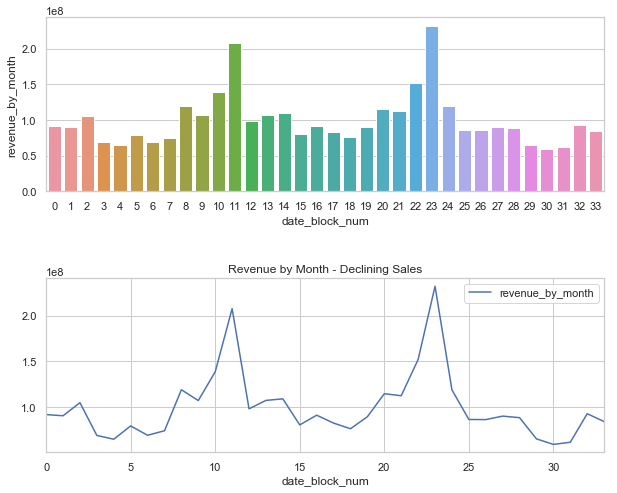

In [12]:
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=.5)

sns.barplot(x='date_block_num', y='revenue_by_month', data=revenue_by_month, ax = ax1)
revenue_by_month.plot(x='date_block_num', y='revenue_by_month', kind='line', ax = ax2)

plt.title('Revenue by Month - Declining Sales')
plt.savefig('plots/declining_sales.png')
plt.show()